# **Assignment 1**, **dataset 3**


# Problem statement
https://archive.ics.uci.edu/dataset/73/mushroom

Additional Information

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended.  This latter class was combined with the poisonous one.  The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.

### Loading the dataset

In [3]:
!pip install ucimlrepo

error: getcwd() failed with errno 2/No such file or directory
error: Could not determine current working directory. Is your locale set correctly?
The folder you are executing pip from can no longer be found.


In [59]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
mushrooms = fetch_ucirepo(id=73)

# data (as pandas dataframes)
X = mushrooms.data.features
y = mushrooms.data.targets

# metadata
print(mushrooms.metadata)

# variable information
print(mushrooms.variables)

# Make sure to split the data for validation

{'uci_id': 73, 'name': 'Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/73/mushroom', 'data_url': 'https://archive.ics.uci.edu/static/public/73/data.csv', 'abstract': 'From Audobon Society Field Guide; mushrooms described in terms of physical characteristics; classification: poisonous or edible', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 8124, 'num_features': 22, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['poisonous'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1981, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5959T', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely po

## **Exploratory Data Analysis**

The student will have to make a written analysis of the data being loaded (depending on the dataset that was assigned to them). They should apply methods of inspecting the data and make some exploratory data analysis

### Understanding the dataset

The goal here is to understand the dataset and its values. This will lay the foundation of how to approach the data processing and transformation.

In [60]:
print("Features:")
print(X.columns)
X.head()


Features:
Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [61]:

y.groupby('poisonous').size()


poisonous
e    4208
p    3916
dtype: int64

Below we can see the type and the amount of non null values. What we notice here is that for the majority of our features there are no Null values. However, as we see for the `stalk-root` feature we have 5644 non-null values out of 8124 entries in our dataset.

In [62]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                5644 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

The information provided at the begining states that the `cap-color` feature is a binary value. However, as we can see below, that is not true:

In [63]:
print(X.groupby('cap-color').size())

cap-color
b     168
c      44
e    1500
g    1840
n    2284
p     144
r      16
u      16
w    1040
y    1072
dtype: int64


### Summary

Blab laablabsbaldb

## **Data Preprocessing**:

If applicable, the student will create new features from existing data to improve model performance and/or select the most relevant features for the model.

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

In [ ]:
onehot = OneHotEncoder()

X_df = pd.DataFrame()

for col in X.columns:
    colValues = X[col]
    values = onehot.fit_transform(colValues.values.reshape(-1, 1))
    values_df = pd.DataFrame(values.toarray(), columns=onehot.get_feature_names_out([col]))

    X_df = pd.concat([X_df, values_df], axis=1)

X_df.info()

print(len(X_df))

X_df.head()

y_df = y.copy()

y_df["poisonous"] = y_df["poisonous"].map(lambda x: int(1) if x == "p" else int(0))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Columns: 117 entries, cap-shape_b to habitat_w
dtypes: float64(117)
memory usage: 7.3 MB
8124


poisonous
e    4208
p    3916
Name: count, dtype: int64

## **Data Transformation**

The student should prepare the data for the training. Augmenting, splitting, and otherwise transforming should be done here.

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

### Reducing dimensionality

Since we have many features to deal with, I will use Principal Component Analysis (PCA) to reduce the amount of dimensions.

In [73]:
from sklearn.decomposition import PCA
import numpy as np


def get_num_components(data, variance_threshold=0.95):
    """
    Determine the number of components to keep based on the explained variance ratio.
    
    :param variance_threshold: The cumulative explained variance ratio threshold.
    :return: The number of components to keep.
    """
    pca = PCA()
    pca.fit(data)

    for i, variance_ratio in enumerate(np.cumsum(pca.explained_variance_ratio_)):
        if variance_ratio >= variance_threshold:
            return i + 1

    return None

num_components = get_num_components(X_train, variance_threshold=0.95)
print(f"Number of components to keep: {num_components}")


Number of components to keep: 40


## **Model Selection**


The student should implement a simple model as a baseline to compare more complex models. The student should try more complex modes and justify their rejection or acceptance.

### LogisticRegression 

In [81]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

logistic_regression_pipeline = Pipeline([
    ('pca', PCA(n_components=num_components)),
    ('classifier', LogisticRegression())
])

logistic_regression_pipeline.fit(X_train, y_train.values.ravel())

Pipeline(steps=[('pca', PCA(n_components=40)),
                ('classifier', LogisticRegression())])

## **Reporting the results**

The student should report the results. Identify which features are most influential in the model’s predictions, if applicable for the dataset and model used.

In [91]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

def evaluate_classifier(model, X_test, y_test, title="Classifier Evaluation"):
    title_display = f"------ {title} ------"
    print(title_display)
    predictions = model.predict(X_test)

    classification_report_result = classification_report(y_test, predictions)
    print("Classification Report:")
    print(classification_report_result)
    
    confusion_matrix_result = confusion_matrix(y_test, predictions)
    cm_plot = ConfusionMatrixDisplay(confusion_matrix_result, display_labels=["Edible", "Poisonous"])
    cm_plot.plot()

    print(len(title_display) * "-")

### Logistic Regression Results

------ Logistic Regression ------
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

---------------------------------


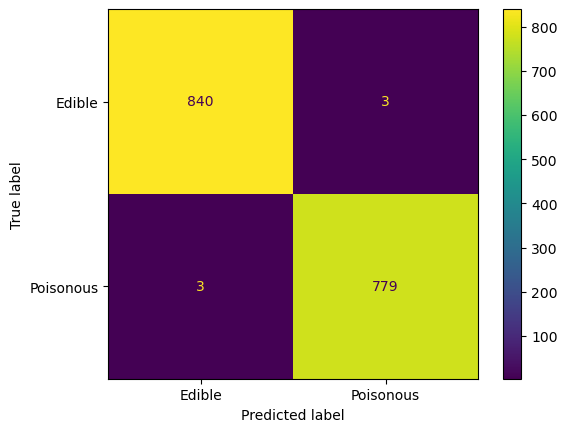

In [92]:
evaluate_classifier(logistic_regression_pipeline, X_test, y_test, title="Logistic Regression")


**Extra**: Any additional discussion and extra work relevant for solving the problem is welcome by the student and will contribute to a better grade.